<a href="https://colab.research.google.com/github/aflores/colab-notebooks/blob/master/covid01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Covid-19 data

Just playing with Pandas using the data provided by:

 https://covidtracking.com/
 
## Things to try
 
 - Read data directly from the project's URL
 - Plot data to observe trends
 

## Journal

### 20MAR

  Initial setup.
  I got HTTP 403 when attempting to retrieve the date via URL but using the browser worked ok.
  So I saved the day's data to get going
  
 
### 21MAR

  Continue to have issues with HTTP retrieval (added comment to a similar Github issue)
  Created a function to plot the daily trend of positive, negavite, pending(testing) and deaths
  
  Plotting is not working as I expected:
  - Using 'date' in the x-axis interprets the axis as a large integer
  - Using 'dateChecked', shows the data in descending order
  :-o
  
  
 ### 22MAR
 
   On the plotting issues
   - type 'scatter' requires an numeric x-axis so by using dateChecked the plot is not 'sorted'
  
  
  



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data_url = "https://covidtracking.com/api/states/daily"
#data_url = "https://covid.cape.io/states/daily" # per webmasterkai github  - fixed in issue 7
#data_file = "/Users/aflores/projects/ml/covid-19/data/states/daily-latest.json"
# !ls /Users/aflores/projects/ml/covid-19/data/states
# !ln -sf

In [4]:
#daily = pd.read_json(data_file, convert_dates=True)
daily = pd.read_json(data_url)

In [5]:
# show the columns data type
#print(daily.dtypes)

In [6]:
# upon reading the data, the date column looks like a number
# but I rather use it as a string so we can show it in the x-axis
daily = daily.astype({"date": str})
#print(daily.dtypes)

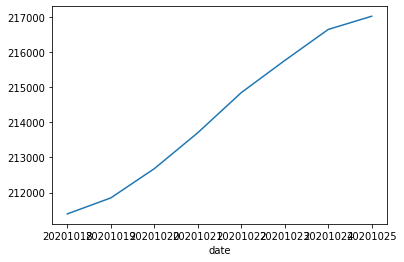

In [42]:
# national = daily[['date','state','positive','negative','death']][(daily.date >= '20201001') & (daily.state == 'FL')]
national = daily[['date','state','positive','negative','death']][(daily.date >= '20201018')]
#national = national.groupby(['date','state']).sum()
#print(national.dtypes)
#national.head()
#national.groupby(['date'])['positive'].sum().plot()
#national.groupby(['date'])['negative'].sum().plot()
national.groupby(['date'])['death'].sum().plot()

In [16]:
def plot_state (state='FL', df=daily, hide_pending=False, hide_negative=False, hide_positive=False, hide_death=False):
    
    """ Plot daily trends for a single state



    """
    
    daily_tmp = df[daily['state'] == state]
    daily_tmp = daily_tmp.sort_values(by=['date'])
    
    x_axis = 'date' # date or dateChecked
    plot_kind = 'line' # type of plot
 
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('count')
    
    
    if (hide_positive == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='positive',color='red')
    
    if (hide_negative == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='negative',color='green')
    
    if (hide_pending == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='pending',color='blue')
    
    # this will be shown on the y-axis on the right side
    if (hide_death == False):
        ax2 = ax1.twinx()
        ax2.set_ylabel('deaths')
        #ax2.grid(linestyle='dotted')
        daily_tmp.plot(kind=plot_kind ,x=x_axis, ax=ax2, y='death',color='black', legend=False)
    
    plt.title(state)
    #plt.setp(ax1.get_xticklabels(),rotation='90')
    
    ax1.grid(linestyle='--')
    
    fig.set_size_inches(5,4)
    fig.tight_layout() 
    
    plt.show()

# test the function    
#plot_state_dual_y(state='NY', hide_pending=True)

In [17]:
def state_pct_change(df_full, state, num_days, col_name):
  """ Percent change over 'num_days' number of days

  """

  df = df_full[df_full['state']== state].head(num_days).sort_values('date',ascending=False)
  row_count = len(df.index)
  ref_value = df.iloc[row_count-1][col_name]
  current_value = df.iloc[0][col_name]
  pct =  (current_value - ref_value)/ref_value
  
  return (col_name, num_days, pct, current_value)

# varx = state_pct_change(daily,'FL',5,'positive')
# print('The current value for "{0[0]}" is "{0[3]}" representing a {0[2]:3.1%} change over {0[1]} days.'.format(varx))

In FL, the current value for "positive" is: 771,780.0 representing a  6% change over 15 days.
In FL, the current value for "death" is: 16,544.0 representing a  8% change over 15 days.
In NY, the current value for "positive" is: 491,771.0 representing a  4% change over 15 days.
In NY, the current value for "death" is: 25,705.0 representing a  1% change over 15 days.
In CA, the current value for "positive" is: 886,865.0 representing a  6% change over 15 days.
In CA, the current value for "death" is: 17,262.0 representing a  5% change over 15 days.
In WA, the current value for "positive" is: 100,525.0 representing a  9% change over 15 days.
In WA, the current value for "death" is: 2,289.0 representing a  5% change over 15 days.
In IL, the current value for "positive" is: 368,746.0 representing a 16% change over 15 days.
In IL, the current value for "death" is: 9,688.0 representing a  5% change over 15 days.
In LA, the current value for "positive" is: 182,603.0 representing a  5% change ov

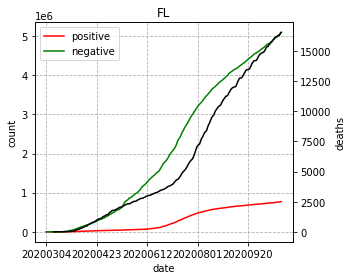

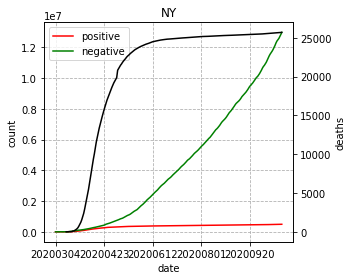

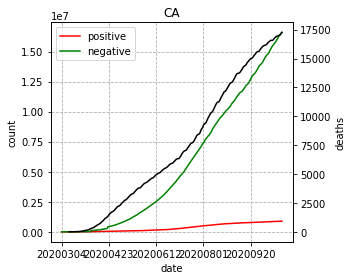

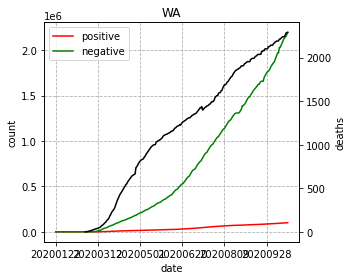

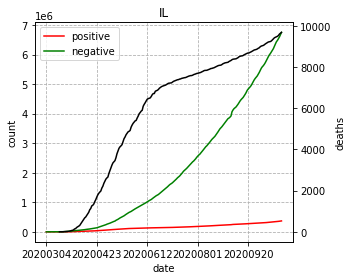

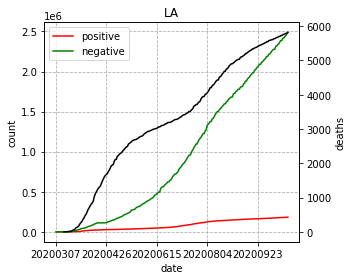

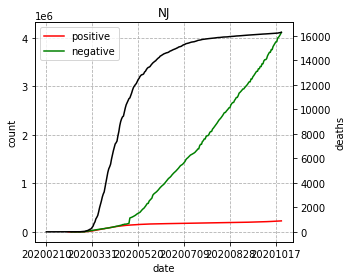

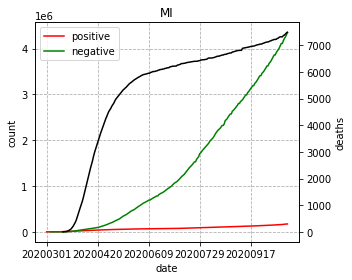

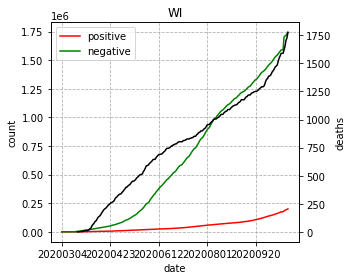

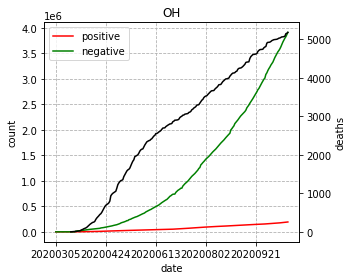

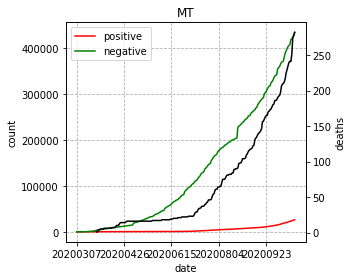

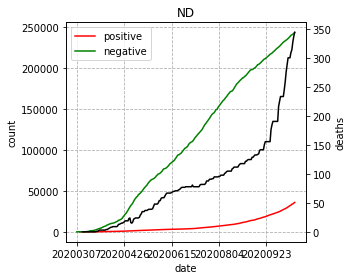

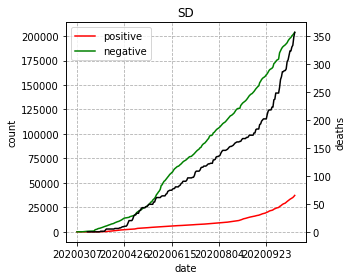

In [18]:
fmt_str = 'In {1}, the current value for "{0[0]}" is: {0[3]:,} representing a {0[2]:3.0%} change over {0[1]:d} days.'

states = ('FL','NY','CA','WA', 'IL','LA','NJ','MI','WI','OH','MT','ND','SD')
for st in states:
    print(fmt_str.format(state_pct_change(daily,st,15,'positive'),st))
    print(fmt_str.format(state_pct_change(daily,st,15,'death'),st))
for st in states:    
    plot_state(st,hide_pending=True)

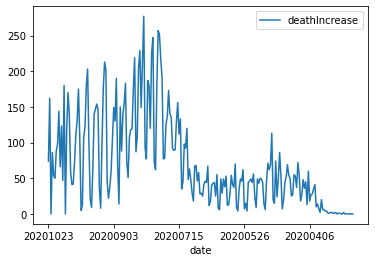

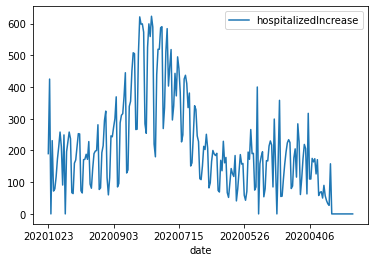

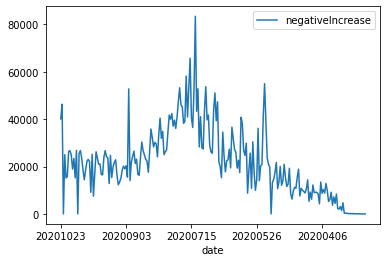

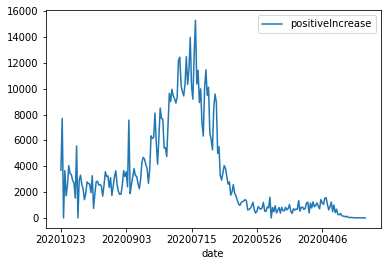

In [19]:
daily_increase = daily[['state','date','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease']]
daily_increase = daily_increase[(daily_increase['state'] == 'FL') & (daily_increase['date'] > '2020-09-15') ]

daily_increase.plot(x='date', y=['deathIncrease'])
daily_increase.plot(x='date', y=['hospitalizedIncrease'])
daily_increase.plot(x='date', y=['negativeIncrease'])
daily_increase.plot(x='date', y=['positiveIncrease'])

In [20]:
daily_increase.head(200) 

,state,date,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease
10,FL,20201023,74,190,40124,3689
66,FL,20201022,162,425,46290,7702
122,FL,20201021,0,0,0,0
178,FL,20201020,86,231,25002,3662
234,FL,20201019,54,72,15184,1707
...,...,...,...,...,...,...
10930,FL,20200411,48,174,9140,963
10986,FL,20200410,36,219,9114,1167
11042,FL,20200409,45,206,8506,909
11098,FL,20200408,13,63,4264,708
